<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Liver_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


1. Basic Cleaning

In [ ]:

missing_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

print("Total missing values in all columns:", missing_per_column.sum())

missing_per_row = df.isnull().sum(axis=1)
print("Missing values per row:")
print(missing_per_row)

print("Total missing values in all rows:", missing_per_row.sum())

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

Missing values per column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64
Total missing values in all columns: 4
Missing values per row:
0      0
1      0
2      0
3      0
4      0
      ..
578    0
579    0
580    0
581    0
582    0
Length: 583, dtype: int64
Total missing values in all rows: 4
Total missing values in the dataset: 4


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [ ]:

duplicate_rows = df.duplicated()
print("Duplicate rows (True means duplicate):")
print(duplicate_rows)

total_duplicates = duplicate_rows.sum()
print("Total number of duplicate rows:", total_duplicates)

df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

Duplicate rows (True means duplicate):
0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool
Total number of duplicate rows: 13


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
137,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
142,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
173,31,Male,0.6,0.1,175,48,34,6.0,3.7,1.60,1
174,31,Male,0.6,0.1,175,48,34,6.0,3.7,1.60,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
107,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2


In [ ]:
df.drop_duplicates(inplace=True)

print("Remaining duplicate rows:", df.duplicated().sum())

duplicates = df[df.duplicated(keep=False)]
duplicates.to_csv("removed_duplicates.csv", index=False)


Remaining duplicate rows: 0


In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}':")
    if df[col].nunique() < 50:
        print(df[col].unique())
    else:
        print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 30)

Unique values in column 'Age':
Number of unique values: 72
------------------------------
Unique values in column 'Gender':
['Female' 'Male']
------------------------------
Unique values in column 'Total_Bilirubin':
Number of unique values: 113
------------------------------
Unique values in column 'Direct_Bilirubin':
Number of unique values: 80
------------------------------
Unique values in column 'Alkaline_Phosphotase':
Number of unique values: 263
------------------------------
Unique values in column 'Alamine_Aminotransferase':
Number of unique values: 152
------------------------------
Unique values in column 'Aspartate_Aminotransferase':
Number of unique values: 177
------------------------------
Unique values in column 'Total_Protiens':
Number of unique values: 58
------------------------------
Unique values in column 'Albumin':
[3.3 3.2 3.4 2.4 4.4 3.5 3.6 4.1 2.7 3.  2.3 3.1 2.6 1.6 3.9 4.  1.9 1.5
 2.9 2.  2.2 2.8 1.8 2.5 2.1 3.7 3.8 4.3 1.7 4.2 4.5 0.9 1.4 4.7 5.5 4.9
 4.6 

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_encoded = df_encoded.rename(columns={'Gender_1': 'Gender_Male'})
df_encoded['Gender_Male'] = df_encoded['Gender_Male'].astype(int)
display(df_encoded.head())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


2. Feature Visualization

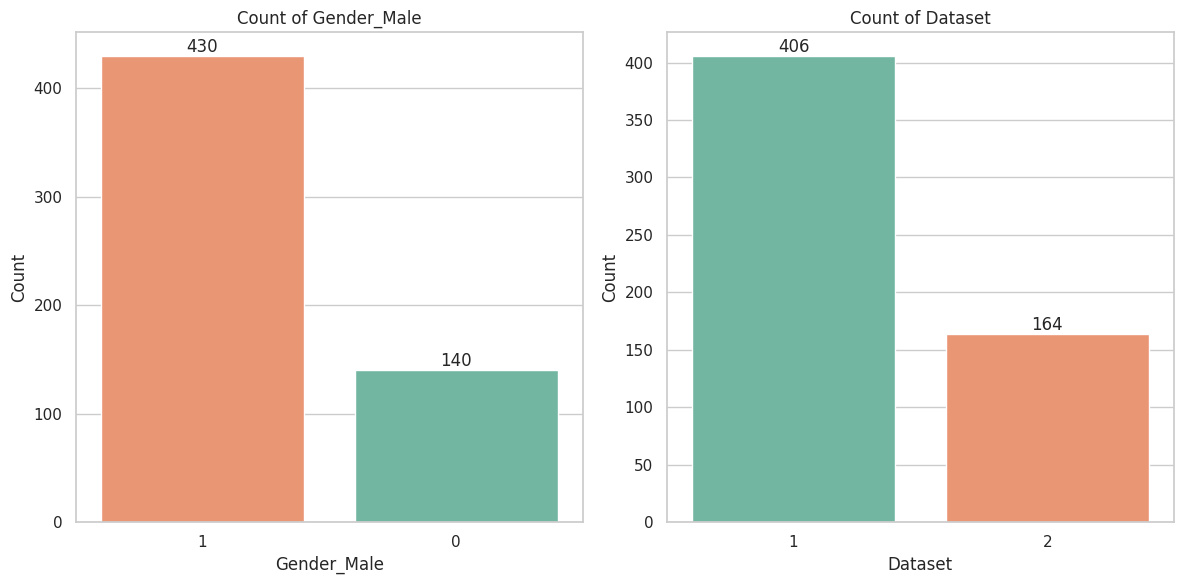

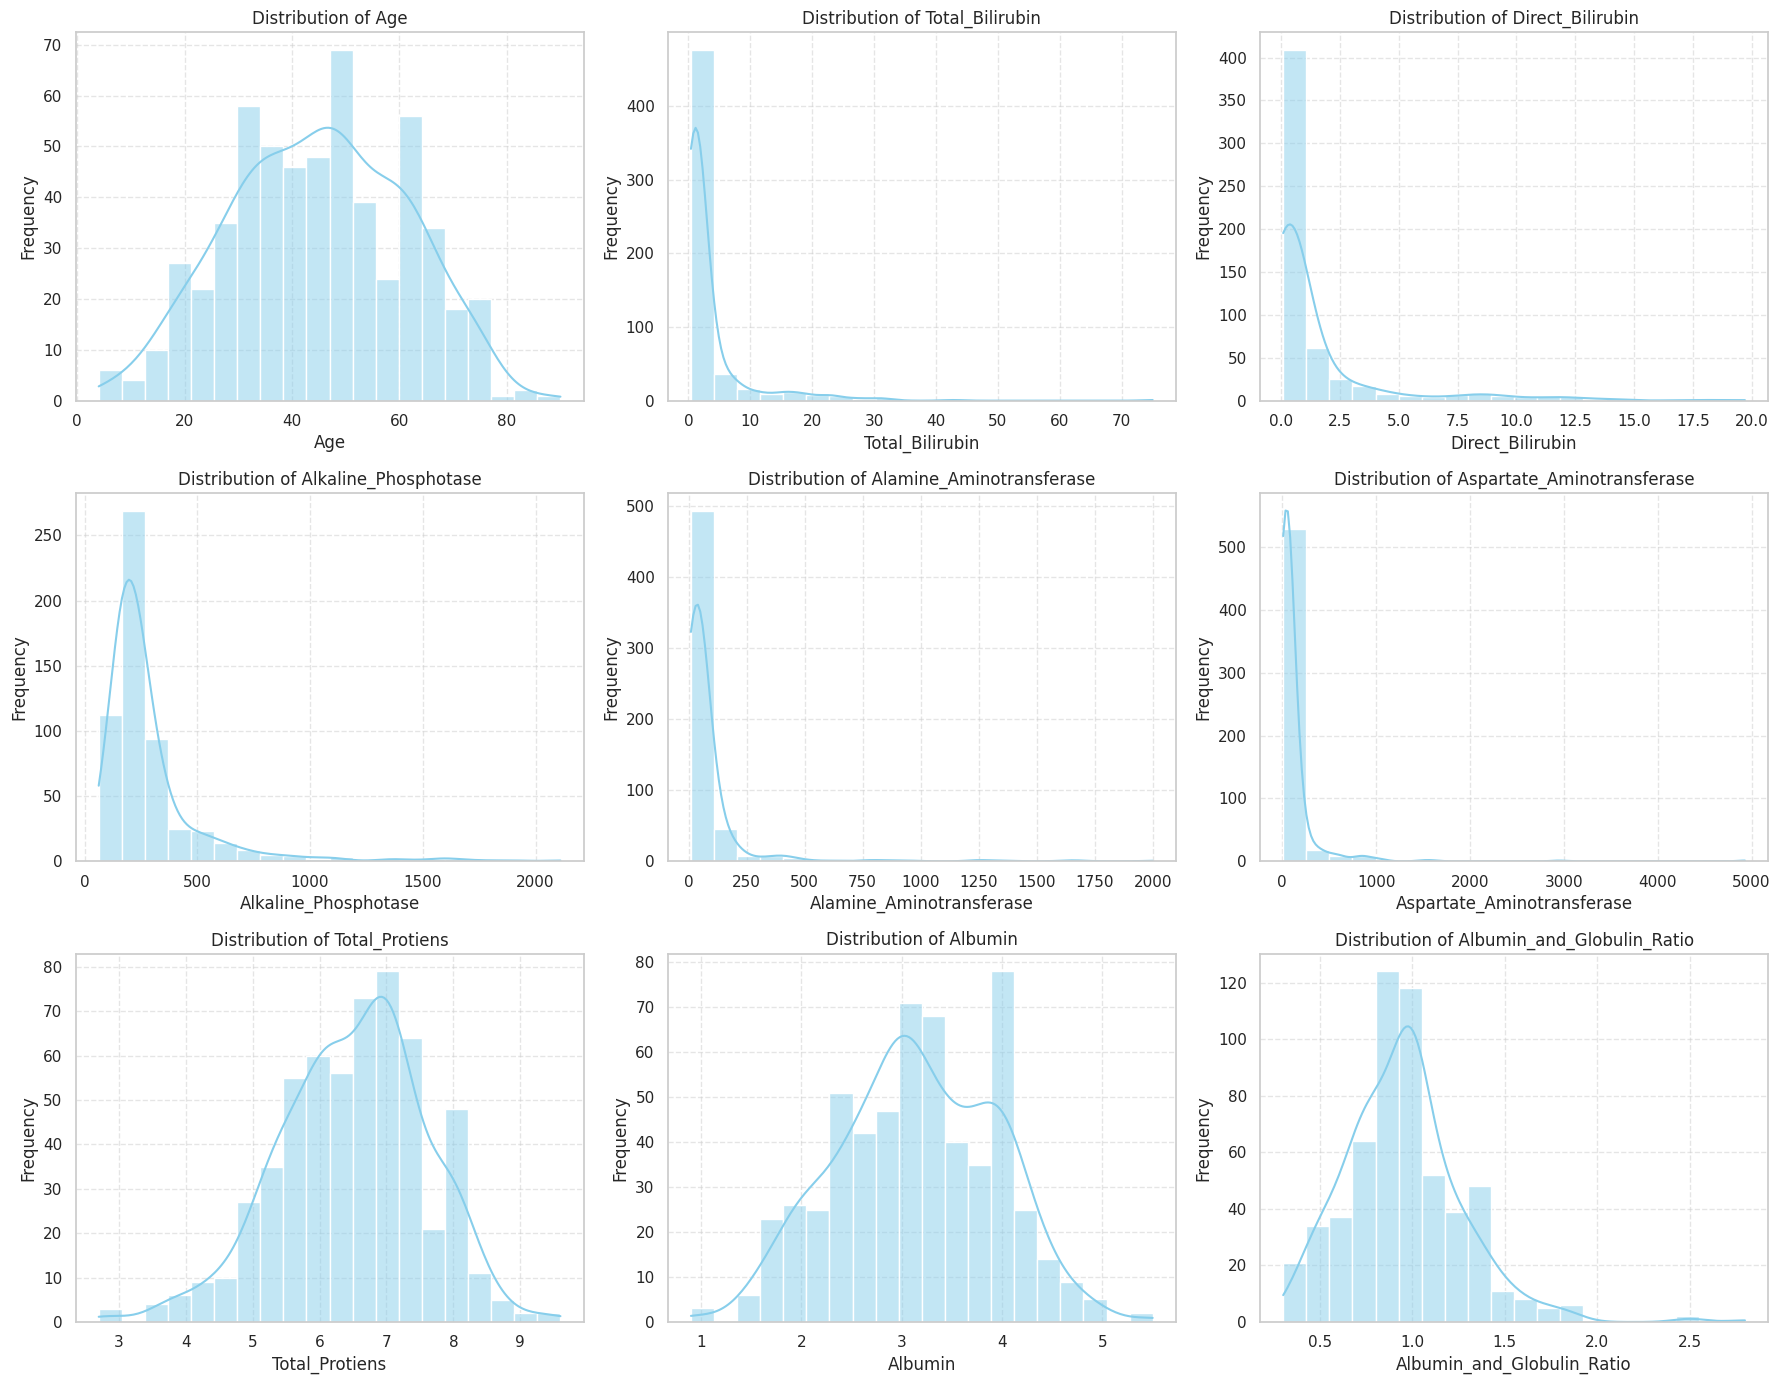

In [ ]:
sns.set(style="whitegrid")

categorical_cols = [
   'Gender_Male', 'Dataset'
]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    order = df_encoded[col].value_counts().index if df_encoded[col].nunique() < 10 else sorted(df_encoded[col].unique())
    ax = axes[i]

    sns.countplot(data=df_encoded, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    if df_encoded[col].nunique() > 5:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

numerical_cols = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin',
    'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase', 'Total_Protiens',
    'Albumin', 'Albumin_and_Globulin_Ratio'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df_encoded[col].dropna(), bins=20, kde=True, color='skyblue', ax=ax) # Use df_encoded
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations from Feature Visualizations:**
Age: Skewed toward older group.

Gender: Mostly male.

Bilirubin & Enzymes: Right-skewed, few high outliers.

Proteins & Albumin: Nearly normal.

A/G Ratio: Around 1.

Dataset: Binary liver disease indicator.


In [ ]:
df_encoded.dtypes

,0
Age,int64
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64
Dataset,int64


3. Spearman and Pearson Correlation

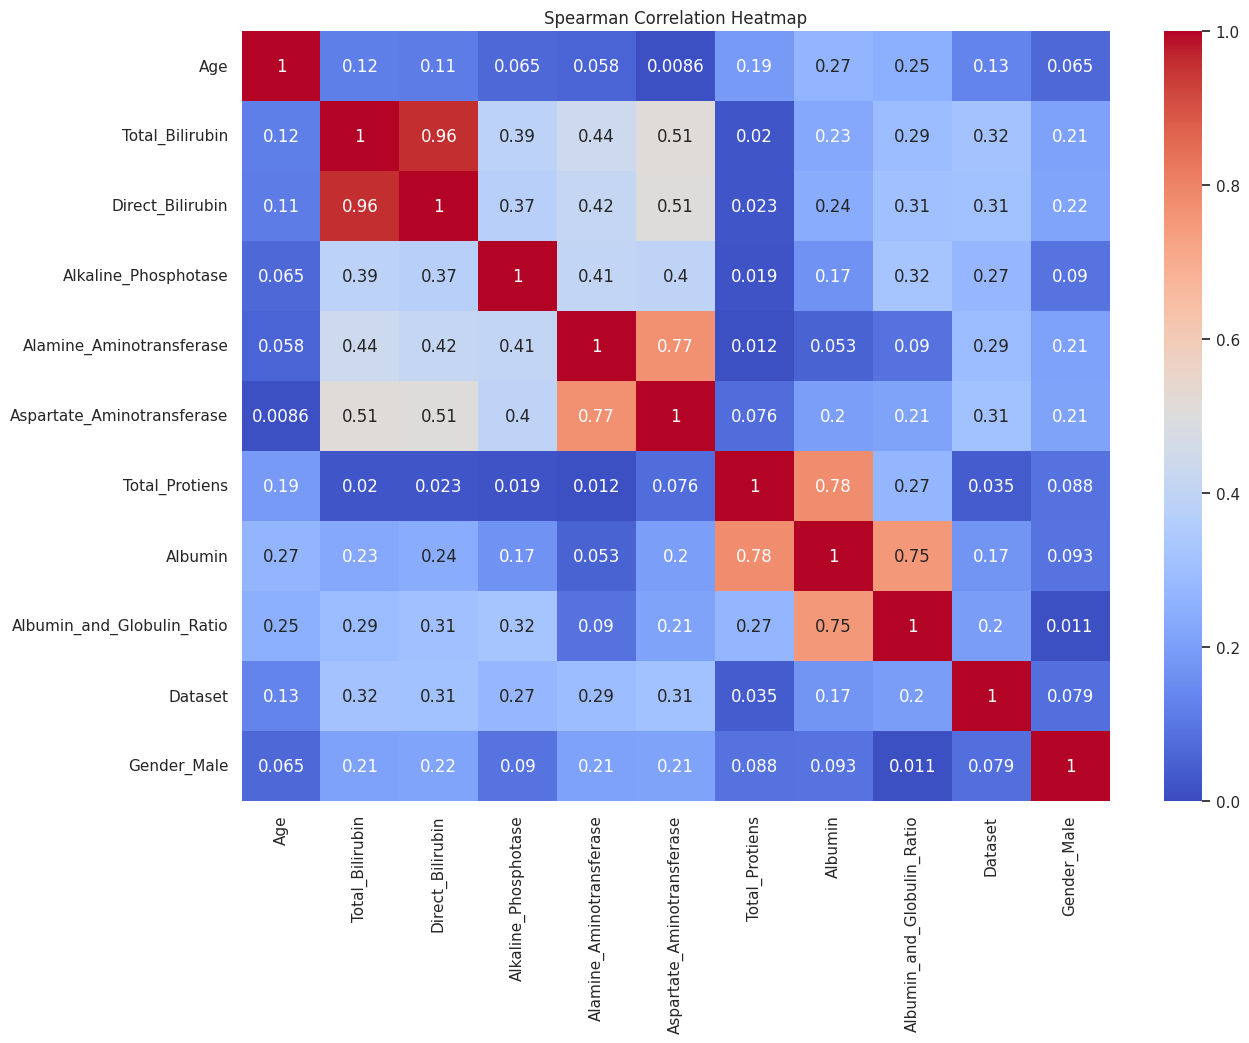

In [ ]:
corr_matrix = df_encoded.corr('spearman').abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
threshold = 0.8

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, row, upper[column][row])
             for column in upper.columns for row in upper.index
             if upper[column][row] > threshold]

print("Highly correlated pairs (|Spearman| > {}):".format(threshold))
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2}: correlation = {corr_val:.2f}")

Highly correlated pairs (|Spearman| > 0.8):
Direct_Bilirubin and Total_Bilirubin: correlation = 0.96


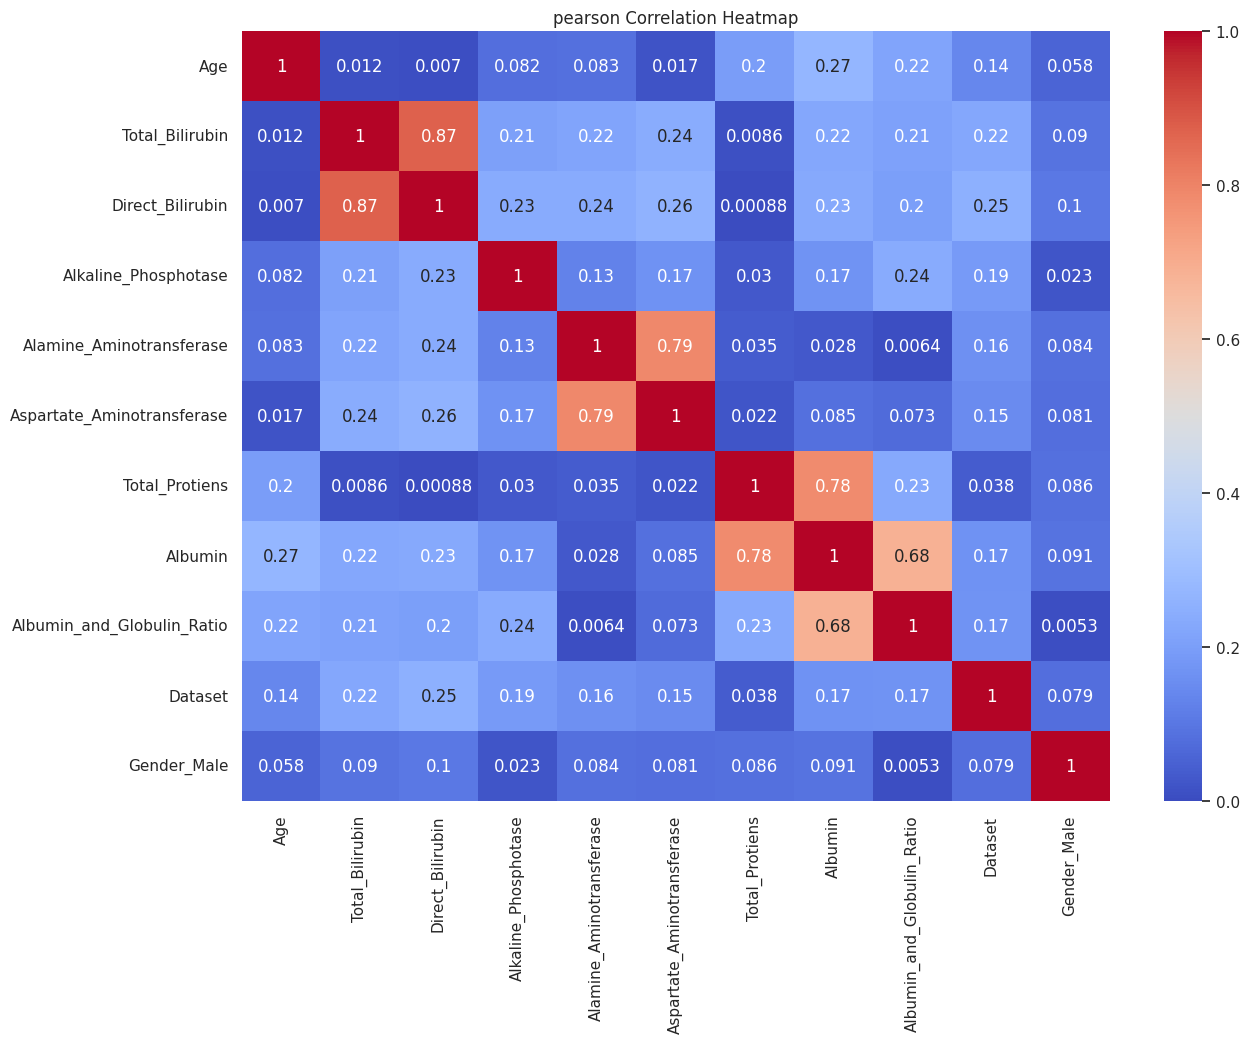

In [ ]:
corr_matrix = df_encoded.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("pearson Correlation Heatmap")
plt.show()

Drop Highly correlated feature 'Direct_Bilirubin'

In [ ]:
numerical_df = df_encoded.select_dtypes(include=np.number)
variances = numerical_df.var()
print("Feature Variances:")
display(variances)

# Set a variance threshold (you can adjust this value)
variance_threshold = 0.01


low_variance_numerical_features = variances[variances < variance_threshold].index.tolist()

print(f"\nNumerical features with variance below {variance_threshold}:")
print(low_variance_numerical_features)

if low_variance_numerical_features:
    df_encoded = df_encoded.drop(columns=low_variance_numerical_features)
    print(f"\nDropped low variance numerical columns: {low_variance_numerical_features}")
else:
    print("\nNo numerical features found with variance below the threshold.")

display(df_encoded.info())

Feature Variances:


,0
Age,263.808479
Total_Bilirubin,39.287083
Direct_Bilirubin,8.027200
Alkaline_Phosphotase,60168.096001
Alamine_Aminotransferase,32931.976891
Aspartate_Aminotransferase,84611.564829
Total_Protiens,1.184398
Albumin,0.634911
Albumin_and_Globulin_Ratio,0.101451
Dataset,0.205297



Numerical features with variance below 0.01:
[]

No numerical features found with variance below the threshold.
<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            570 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    int64  
 4   Alamine_Aminotransferase    570 non-null    int64  
 5   Aspartate_Aminotransferase  570 non-null    int64  
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  570 non-null    float64
 9   Dataset                     570 non-null    int64  
 10  Gender_Male                 570 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 53.

None

In [ ]:
features_to_drop = ['Direct_Bilirubin']
df_dropped = df_encoded.drop(columns=features_to_drop)

print("DataFrame after dropping highly correlated features:")
display(df_dropped.head())

DataFrame after dropping highly correlated features:


,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,195,27,59,7.3,2.4,0.40,1,1


In [ ]:
df_dropped.to_csv('processed_liver_patient_data.csv', index=False)

print("Processed data saved to 'processed_liver_patient_data.csv'")

Processed data saved to 'processed_liver_patient_data.csv'
